## P4DS: Assignment 3 (Autumn 2021)

# Data Analysis Project

#### Notebook template design: Brandon Bennett 
Original: 2020.11.3<br>
Revised: 2021.03.02, 2021.11.10

# _The UK COVID-19 situation and its impact_

* Yuheng Zhang, ml209yz@leeds.ac.uk
* Kaidong Tang, ml20kt2@leeds.ac.uk
* Hang Li, ml20hl2@leeds.ac.uk

# Project Plan

## The Data

#### Objective 1
The three datasets come from the World Health Organization website(https://covid19.who.int/info?openIndex=2) which namely ‘global covid data’, ‘global vaccination data’ and ‘summary data’.<br>

The dataset, ‘global covid data’, includes new cases, cumulative cases, new death, and cumulative deaths of every country. The second dataset, ‘global vaccination data’, includes the information on vaccination. The dataset, ‘summary data’ includes the sum of epidemic data for each country. These data are used by the World Health Organization (WHO) to analyze the global epidemic situation by relevant staff in various countries.<br>

The data are secondary data, and the data are very complete and consistent. It also has no error coding and conforms to the standard structure of the dataset.

#### Objective 2
All data sets are from GOV.UK - Coronavirus (COVID-19) in the UK: https://coronavirus.data.gov.uk/<br>

Three datasets were used for this objective, namely: "UK.csv", "Nation.csv", "Region.csv". "UK.csv" has 664 rows and 9 columns, which is the statistics of coronavirus for the whole of the UK. It contains the code of the area, the name of the area, the type of area, the date, the vaccination rate by stages, the number of additional cases per day and the number of additional deaths per day. "Nation.csv" has 2564 rows and 8 columns, which is the statistics of coronavirus for the four nations of the UK. It contains the code of the area, the name of the area, the type of area, the date, the daily increase in the number of cases and their percentage, the cumulative number of cases and their percentage. "Region.csv" has 5790 rows and 8 columns, which is the statistics of coronavirus for the nine regions of England which contain the same columns as "Nation.csv".<br>

Since all data are sourced from official UK government websites, the data are considered accurate and reliable in this analysis.

#### Objective 3
The case data comes from official UK Government statistics, the overall unemployment rate and gender unemployment rate data from the OECD and the occupational unemployment rate from Nomis. All three sources are official statistics, which means they are highly credible.<br>
https://www.nomisweb.co.uk/query/construct/summary.asp?reset=yes&mode=construct&dataset=17&version=0&anal=5&initsel=<br>
https://data.oecd.org/unemp/unemployment-rate.htm<br>
https://coronavirus.data.gov.uk<br>

The main data included in the case data are date, newCasesBySpecimenDate and cumCasesBySpecimenDate. The main data included in the unemployment data are Location, time, and value.<br>

Unemployment rate data for different occupations are divided into different tables according to the occupation. Each table contains data for region, Numerator, Denominator and the value of the unemployment rate for a whole year starting from different months.

## Project Aim and Objectives

The general objective of this project, through published data, is to analyse the current state of the COVID-19 in the UK and the impact of the outbreak on unemployment rates, with the central focus on the UK's figures on the epidemic. It will also examine the similarities and differences in the UK epidemic around the world through a cross-sectional comparison of international epidemic data to assess the UK's performance in preventing and controlling the epidemic.<br>
The project will be carried out in the following areas:<br>
* __Classification:__  The global Covid data is divided into outbreak data, vaccine data and aggregated data. However, the Covid data of the UK is divided into administrative levels: the United Kingdom, nations of the UK, and regions of England, while unemployment rates can be broken down by gender and industry.<br>
* __Correlation:__  To explore the correspondence between different attributes in the datasets, we can choose time as a connecting term. For example, the development of an epidemic is time-based and it is possible to use time as a bridge to merge the datasets to find a relationship between the epidemic and the unemployment rate so that they can be processed analytically.<br>
* __Visualisation:__  After the data has been collected, cleaned, extracted and correlated, it will be visualised in a variety of ways, such as line graphs, bar charts, pie charts, etc. Explain the patterns between the data in different dimensions and make the charts clear and intuitive.

### Specific Objective(s)
* __Objective 1:__ To explore the status of the UK epidemic in the world
* __Objective 2:__ Analysis coronavirus (COVID-19) data in the UK
* __Objective 3:__ To analyze of the impact of the epidemic on unemployment 

## System Design

### Architecture

The project is broadly divided into three parts in terms of process, data collection, data processing and data analysis.

Original Data ---> Data collection ---> Data processing ---> Data analysis ---> Outcome

However, the data collection, processing and analysis strategies used differ for different data. For example, at the data collection stage, some of the raw data has enough content to be used for analysis, so it can be used by simply filtering it, while for those that cannot be analysed directly, different tables may need to be joined together to use them. Data processing mostly refers to the processing of special values in a data set, e.g. null values, etc. Data analysis refers to the calculation and plotting of data to analyse the information it contains. Examples include calculating averages, plotting line graphs, etc.<br>

The overall structure of the project is divided into three parts, the details and functions of which are shown in the diagram.<br>
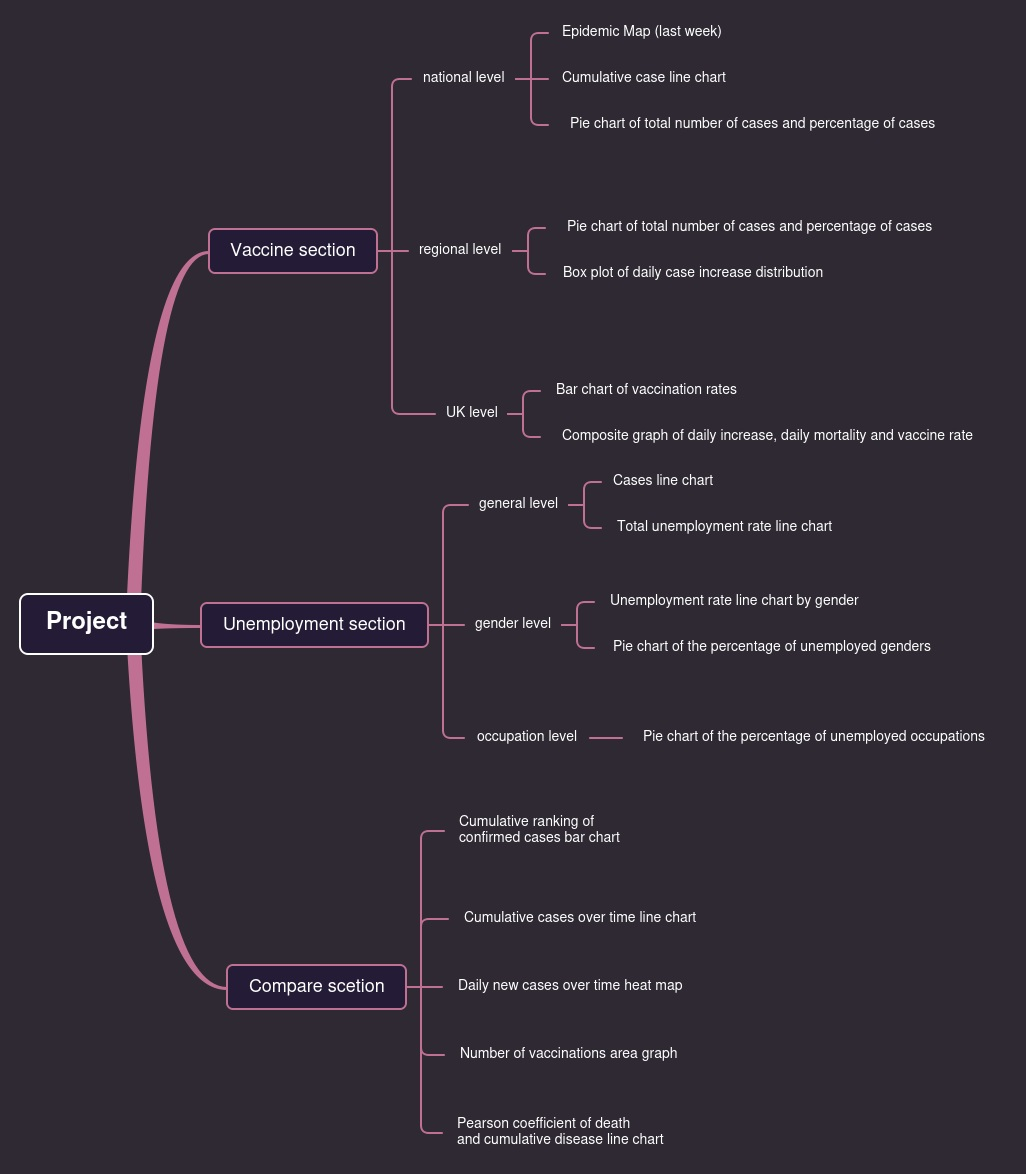
  
### Processing Modules and Algorithms

* In the data preparation phase, the raw data is converted to a DataFrame using Pandas, and the missno module is then called to visualise the missing values and determine whether the missing values will have an impact on the analysis results based on the visualisation. The value is then processed, e.g. deleted or artificially assigned.

* In the data visualisation phase, data is first extracted from the dataset according to the dimension to be analysed and then processed to suit the type of data required. The next step is to import the Pyechart and matplotlib modules, input the processed data, set the various variables for the chart and finally generate a visual chart of the data.

* The Pearson correlation coefficient formula was used in this project. It is used to measure the degree of linear correlation between two variables (X and Y), with a value between -1 and 1. This linear correlation is expressed intuitively as whether Y increases or decreases at the same time as X increases; when the two are distributed on a straight line, the Pearson correlation coefficient is equal to 1 or -1; when there is no linear relationship between the two variables, the Pearson correlation coefficient is 0. It is used to calculate the magnitude of the linear correlation between the cumulative number of cases and the number of deaths.

# Program Code

## Objective 1

Import packages for manipulating data and drawing, including Matplotlib, pandas, numpy, and seaborn

In [1]:
# for numerical analysis
from scipy.stats import pearsonr
import numpy as np

# to store and process data in dataframe
import pandas as pd

# basic visualization package
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import seaborn as sns

Load the file summary data.csv and verify that the file was read successfully

In [2]:
#load data
summary_data = pd.read_csv('summary data.csv')
summary_data

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,147473,6736.0,98073.0,42664.0,1124.0,3699,169.0,707244.0,17739.0,39869084
1,Albania,Europe,133081,2457.0,130222.0,402.0,3.0,46299,855.0,916777.0,318945.0,2874408
2,Algeria,Africa,171392,4254.0,115276.0,51862.0,47.0,3834,95.0,230861.0,5164.0,44701619
3,Andorra,Europe,14678,128.0,14210.0,340.0,NaN,189643,1654.0,193595.0,2501292.0,77398
4,Angola,Africa,42646,1008.0,36708.0,4930.0,8.0,1256,30.0,681443.0,20065.0,33961015
...,...,...,...,...,...,...,...,...,...,...,...,...
215,Wallis And Futuna Islands,Australia/Oceania,445,7.0,438.0,0.0,NaN,40359,635.0,20508.0,1859967.0,11026
216,Western Sahara,Africa,10,1.0,8.0,1.0,NaN,16,2.0,NaN,NaN,613090
217,Yemen,Asia,7061,1375.0,4185.0,1501.0,23.0,231,45.0,152937.0,5009.0,30530919
218,Zambia,Africa,195816,3389.0,187236.0,5191.0,422.0,10341,179.0,2089592.0,110352.0,18935680


Load the summary dataset,extract country, total_confirmed and total_recovered, and sort it by the values of total_confirmed to prepare the drawing of the top 10 COVID-19 confirmed countries

In [3]:
#according to the total confirmed number select the top 10 countries
summary = summary_data[['country','total_confirmed','total_recovered']]
sub1 = summary.sort_values('total_confirmed').tail(10)
sub1

,country,total_confirmed,total_recovered
186,Spain,4447044,3711200.0
45,Colombia,4785320,4578519.0
7,Argentina,4929764,4569552.0
203,Turkey,5727045,5454360.0
206,UK,5856528,4508650.0
71,France,6127019,5700815.0
160,Russia,6265873,5608619.0
26,Brazil,19917855,18619542.0
93,India,31654584,30812873.0
210,USA,35733967,29666084.0


The code cellwas created to chart the number of COVID-19 cases and the number of cures in the top 10 countries. The values of total Confirmed and Total Recovered columns of the sorted table were taken as ordinate, and the country column was extracted as horizontal and vertical coordinates. Legend was added to better distinguish the number of confirmed cases and cured cases in each country by color.

In [4]:
#Code for the first figure
def F1():
    x = sub1.country
    #two groups
    y1 = sub1.total_confirmed 
    y4 = sub1.total_recovered
    df2 = pd.DataFrame([y1, y4])
    plt.rcParams["figure.figsize"] = (15, 12)
    df2.plot.bar(width=0.9);
    plt.title("Covid-19 in top 10 most confirmed countries")#set title
    plt.xlabel('Countries')# x labs
    plt.legend(x, loc='upper left')#add legend
    positions = (0, 1)
    labels = ("Total confirmed","Total recovered") # set x axis labels
    plt.xticks(positions, labels,rotation=360)
    plt.grid()
    plt.show()


Prepare a second chart comparing the number of infections per million people in the UK, Canada, Germany, the US and France. By loading and processing the global Covid data.csv and initializing the date at load time. Extract relevant data for the countries to be compared.

In [5]:
#### the second figure
df = pd.read_csv('global covid data.csv', parse_dates=['Date_reported'])

countries = ['Canada', 'Germany', 'The United Kingdom', 'United States of America', 'France', 'China']
# select data for 6 countries
df = df[df['Country'].isin(countries)]

Through pivot, the entire chart is reconstructed, with the date as the index and the cumulative number of infections as the value. The population of the countries to be compared is extracted and stored in a dictionary.The index of the dictionary is the country name and the value is the population.This step is to prepare for the next step of calculating the number of infections per million people.

In [6]:
# make a table to plot 
df = df.pivot(index='Date_reported', columns='Country', values='Cumulative_cases')
covid = df

#population of each country
pop1 = summary_data[summary_data['country'].isin(['Canada', 'Germany', 'UK', 'USA', 'France', 'China'])]
pop1 = pop1[['country','population']]
pop2 = list(pop1['population'])
populations = dict(zip(countries, pop2))
populations

{'Canada': 38098354,
 'Germany': 1439323776,
 'The United Kingdom': 65429176,
 'United States of America': 84072622,
 'France': 68270129,
 'China': 333093143}

Through the for loop, the number of infections per million people in each country is calculated and stored in the percapita table. Formula: The number of infected persons per million population = (infected persons/population) x 1000000

In [7]:
#calcualte xxx per million population
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*1000000

Store the color of the line for each country by setting the list colors list. Set the X-axis to the date and the Y-axis to the cumulative number of infections per million population. Adjust the size of the table by figSize, and adjust the thickness of the line on the way by linewith. Place the lines corresponding to each country on the right to show the country name.

In [8]:
def F2():
    colors = {'Canada':'#045275', 'China':'#089099', 'France':'#7CCBA2', 'Germany':'#FCDE9C',
              'United States of America':'#DC3977', 'The United Kingdom':'#7C1D6F'}
    # set the style
    plt.style.use('fivethirtyeight')
    plot = percapita.plot(figsize=(20,11), color=list(colors.values()), linewidth=10, legend=False)
    # set y axis
    plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    # set grid
    plot.grid(color='#d4d4d4')
    plot.set_xlabel('Date')
    plot.set_ylabel('Cumulative cases per million population')
    
    # x, y: coordinates，s: test content
    for country in list(colors.keys()):
        if country == 'The United Kingdom':
            plot.text(x=percapita.index[-1],y=percapita[country].max(),color=colors[country],s="UK",weight='bold')
        elif country == 'United States of America':
            plot.text(x=percapita.index[-1],y=percapita[country].max(),color=colors[country],s="USA", weight='bold')
        
        else:
            plot.text(x=percapita.index[-1],y=percapita[country].max(),color=colors[country],s=country,weight='bold')

    # x，y: coordinates of test ，s: content
    plot.text(x = percapita.index[1], y = int(percapita.max().max())+2000, s = "COVID-19 Cases by Country", 
              fontsize =30, weight = 'bold', alpha = .75)
    

The third chart uses a heat map to show daily new cases in Britain, Spain, Germany and France. Set the abscissa to date and the ordinate to different countries, and the bright changes in the graph reflect the different numbers of new arrivals in different countries each day.

In [9]:
#### the third figure
def F3():
    df = pd.read_csv('global covid data.csv')
    countries = ['Italy', 'Germany', 'The United Kingdom', 'France', 'Spain']
    df = df[df['Country'].isin(countries)]
    df = df.pivot(columns='Date_reported', index='Country', values='New_cases')
    
    plt.figure(figsize=(16, 9))
    sns.heatmap(df)
    plt.title("Daily new cases of Covid-19 ")#set title
    plt.tight_layout()

Global Vaccination data.CSV was loaded and time initialization was performed to analyze the quantitative relationship of vaccines injected in each country. The data for each country is extracted from the dataset, and then the corresponding cumulative total vaccine doses administered, the number of persons vaccinated with at least one dose, and the number of persons fully vaccinated are extracted.

In [10]:
#### the fourth figure 
df_vaccination = pd.read_csv('global vaccination data.csv', parse_dates=['DATE_UPDATED'])

countries = ['Canada', 'Germany', 'The United Kingdom', 'United States of America', 'France', 'China']
# select data for above countries
df_vaccination = df_vaccination[df_vaccination['COUNTRY'].isin(countries)]
df_vaccination.columns

x = df_vaccination.COUNTRY
y1 = df_vaccination.TOTAL_VACCINATIONS
y2 = df_vaccination.PERSONS_FULLY_VACCINATED
y3 = df_vaccination.PERSONS_VACCINATED_1PLUS_DOSE

The horizontal coordinate represents total vaccinations, persons fully, and persons 1plus dose. The horizontal axis is the number of people who were vaccinated. Legend was added to distinguish countries by color.

In [11]:
def F4():
    df1 = pd.DataFrame([y1,y2, y3]) #conbine y1,y2, y3
    plt.rcParams["figure.figsize"] = (10, 6)
    df1.plot.area(); #area plot
    
    plt.title("Vaccinations of Covid-19")#set title
    
    plt.legend(x, loc='upper right')
    positions = (0, 1,2)
    # set x axis labels
    labels = ("Total vaccinations","Persons fully vaccinated", "Persons vaccinated 1plus dose") 
    plt.xticks(positions, labels,rotation=360)
    plt.xticks(rotation=360)
    
    plt.grid()
    plt.show()

Extract data from Global Covid Data.csv for Canada, Germany, United Kingdom, United States, France and China. Save to a new Dataframe

In [12]:
#### The fifth figure
df = pd.read_csv('global covid data.csv', parse_dates=['Date_reported'])

countries = ['Canada', 'Germany', 'The United Kingdom', 'United States of America', 'France', 'China']
# select data for above countries
df = df[df['Country'].isin(countries)]

Six subgraphs were constructed to observe the cumulative number of cases in each country at different cumulative number of deaths. By setting the abscissa to the cumulative number of diagnoses and the ordinate to the cumulative number of deaths, a near-continuous curve is obtained. The relationship between the cumulative number of cases and cumulative number of deaths can be judged. The function pearsonr(X,Y) is used to calculate correlation coefficient.

In [13]:
# Scatterplot Plot
def F5():
    fig, ax = plt.subplots(3,2, figsize=(12, 15)) #design subplots

    #the first subplot
    ax[0,0].plot(df.loc[df["Country"]=='Canada',"Cumulative_cases"], df.loc[df["Country"]=='Canada',"Cumulative_deaths"], 
                 marker='o', linestyle='', ms=6, label='Canada')
    #add correlation coefficient
    cor = pearsonr(df.loc[df["Country"]=='Canada',"Cumulative_cases"], df.loc[df["Country"]=='Canada',"Cumulative_deaths"])
    ax[0,0].text(10000, 9.5, 'Pearsons correlation: %.3f' % cor[0])
    ax[0,0].legend() #add legend
    ax[0,0].set_xlabel('Cumulative cases')
    ax[0,0].set_ylabel('Cumulative deaths')
    
    ax[0,1].plot(df.loc[df["Country"]=='Germany',"Cumulative_cases"], df.loc[df["Country"]=='Germany',"Cumulative_deaths"], 
                 marker='o', linestyle='', ms=6, label='Germany')
    cor = pearsonr(df.loc[df["Country"]=='Germany',"Cumulative_cases"], df.loc[df["Country"]=='Germany',"Cumulative_deaths"])
    ax[0,1].text(10000, 9.5, 'Pearsons correlation: %.3f' % cor[0])
    ax[0,1].legend()
    ax[0,1].set_xlabel('Cumulative cases')
    ax[0,1].set_ylabel('Cumulative deaths')
    
    ax[1,0].plot(df.loc[df["Country"]=='The United Kingdom',"Cumulative_cases"],
                 df.loc[df["Country"]=='The United Kingdom',"Cumulative_deaths"],marker='o',linestyle='',ms=6,label='The United Kingdom')
    cor = pearsonr(df.loc[df["Country"]=='The United Kingdom',"Cumulative_cases"], 
                   df.loc[df["Country"]=='The United Kingdom',"Cumulative_deaths"])
    ax[1,0].text(10000, 9.5, 'Pearsons correlation: %.3f' % cor[0])
    ax[1,0].legend()
    ax[1,0].set_xlabel('Cumulative cases')
    ax[1,0].set_ylabel('Cumulative deaths')
    
    ax[1,1].plot(df.loc[df["Country"]=='United States of America',"Cumulative_cases"], 
                 df.loc[df["Country"]=='United States of America',"Cumulative_deaths"],marker='o',linestyle='',ms=6,
                 label='United States of America')
    cor = pearsonr(df.loc[df["Country"]=='United States of America',"Cumulative_cases"], 
                   df.loc[df["Country"]=='United States of America',"Cumulative_deaths"])
    ax[1,1].text(10000, 9.5, 'Pearsons correlation: %.3f' % cor[0])
    ax[1,1].legend()
    ax[1,1].set_xlabel('Cumulative cases')
    ax[1,1].set_ylabel('Cumulative deaths')
    
    ax[2,0].plot(df.loc[df["Country"]=='France',"Cumulative_cases"], df.loc[df["Country"]=='France',"Cumulative_deaths"],
                 marker='o', linestyle='', ms=6, label='France')
    cor = pearsonr(df.loc[df["Country"]=='France',"Cumulative_cases"], df.loc[df["Country"]=='France',"Cumulative_deaths"])
    ax[2,0].text(10000, 9.5, 'Pearsons correlation: %.3f' % cor[0])
    ax[2,0].legend()
    ax[2,0].set_xlabel('Cumulative cases')
    ax[2,0].set_ylabel('Cumulative deaths')
    
    ax[2,1].plot(df.loc[df["Country"]=='China',"Cumulative_cases"], df.loc[df["Country"]=='China',"Cumulative_deaths"],
                 marker='o', linestyle='', ms=6, label='China')
    cor = pearsonr(df.loc[df["Country"]=='China',"Cumulative_cases"], df.loc[df["Country"]=='China',"Cumulative_deaths"])
    ax[2,1].text(10000, 9.5, 'Pearsons correlation: %.3f' % cor[0])
    ax[2,1].legend()   
    plt.show()
    ax[2,1].set_xlabel('Cumulative cases')
    ax[2,1].set_ylabel('Cumulative deaths')

## Objective 2

As the data are in csv file format, we use "pandas" to convert the raw data into a DataFrame.

In [14]:
import pandas

DF1 = pandas.read_csv("UK.csv")
DF2 = pandas.read_csv("Nation.csv")
DF3 = pandas.read_csv("Region.csv")

Using "missingno" to check missing data of each DataFrame

<AxesSubplot:>

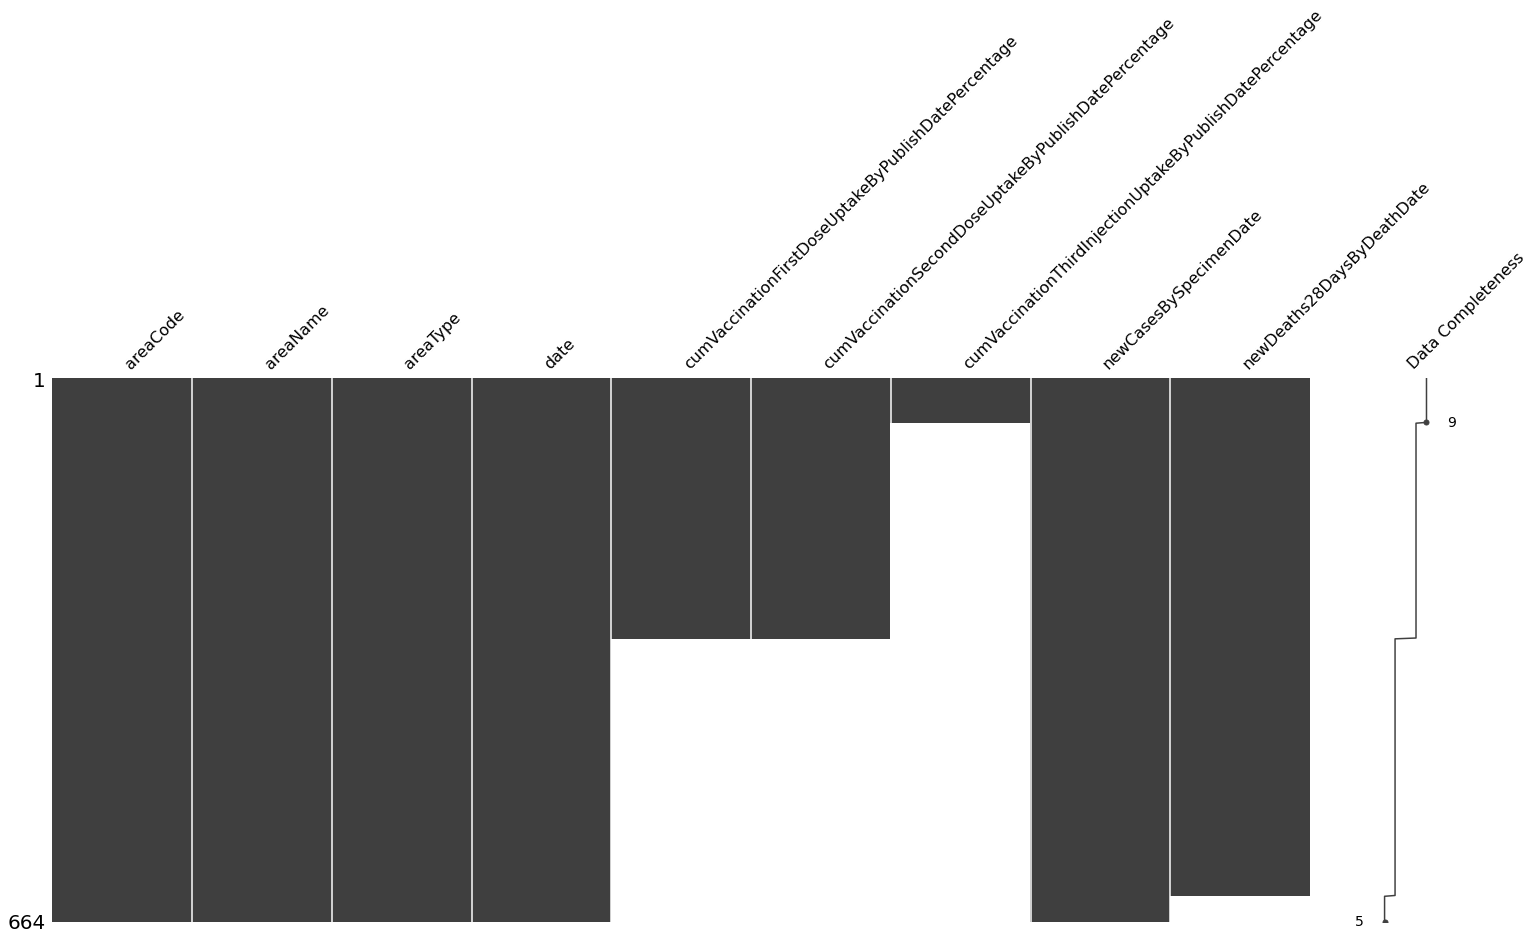

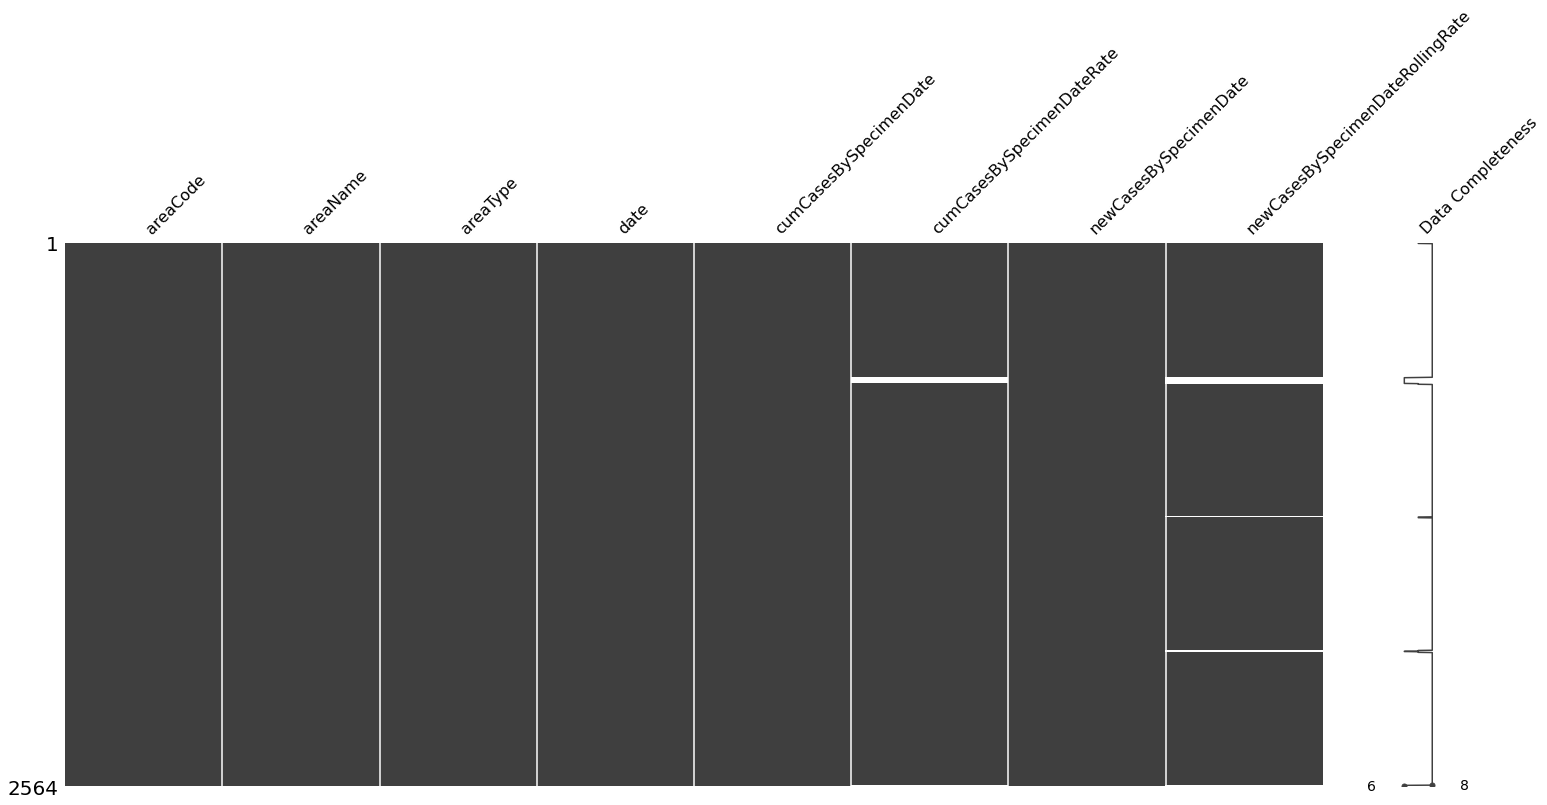

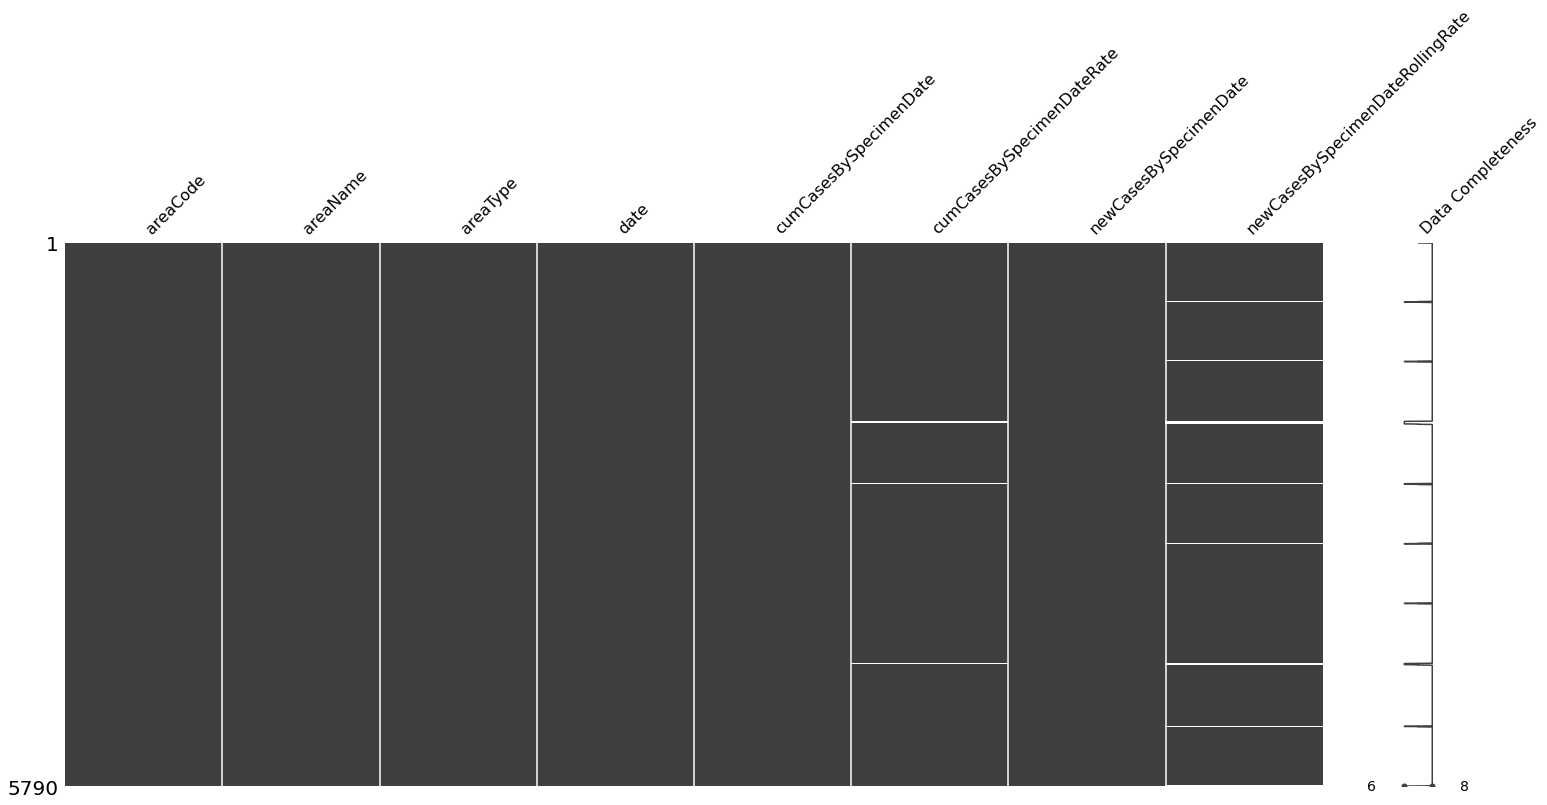

In [15]:
import missingno as msno

msno.matrix(DF1, labels = True)
msno.matrix(DF2, labels = True)
msno.matrix(DF3, labels = True)

Visualisation of the missing data shows that all three DataFrames have some missing data. However, upon examination of the CSV file it was found that:<br>
1.The missing columns in the "UK.csv" are all vaccination rates, therefore the time of vaccination onset can be selected as the origin for the analysis and does not affect the results.<br>
2.The missing data in the "Nation.csv" is due to the fact that the first case was found in different nations in the UK and the nation where the case was found last can be chosen as the origin, again without affecting the results of the analysis.<br>
3.Missing data in "Region.csv" can be handled in the same way as "Nation.csv".<br>

Install and import the modules used for analysis<br>
* __pip(3) install pyecharts__

In [16]:
from pyecharts import options as opts
from pyecharts.charts import Bar, Boxplot, Line, Map, PictorialBar, Pie
from pyecharts.globals import SymbolType

The following function is used to plot the epidemic areas of the UK nations which visualizes the number of new cases per 100,000 people in each nation as of 2021-11-19.

In [17]:
def objective_2_map():
    df = DF2.loc[(DF2["date"] == "2021-11-19")]
    # Set axis variables
    data_dic = {}
    for index, row in df.iterrows():
        name = row["areaName"]
        rate = row["newCasesBySpecimenDateRollingRate"]
        data_dic[name] = int(rate)
    data_dic = list(data_dic.items())
    # plot map
    map = (
        Map()
        .add(series_name = "Per 100,000 People", data_pair = data_dic, maptype = '英国')
        .set_global_opts(title_opts = opts.TitleOpts(title="New Cases (Last 7 Days)"),
                         visualmap_opts = opts.VisualMapOpts(is_piecewise=True, 
            pieces = [{"min":700},{"min":600,"max":699},{"min":500,"max":599},{"min":400,"max":499},{"min": 300,"max":399},{"max":299}]))
        .set_series_opts(tooltip_opts = opts.TooltipOpts(trigger="item", formatter="{a} <br/> {b} : {c} cases"))
        )
    return map.render_notebook()

The following function is used to plot the epidemic growth curve which shows the growth curve of cases per 100,000 people in each UK nation since the start of Covid-19.

In [18]:
def objective_2_line():
    df = DF2
    # Set axis variables
    x = list(df[df["areaName"]=="Northern Ireland"]["date"].iloc[::-1])
    Eng = list(df[df["areaName"]=="England"]["cumCasesBySpecimenDateRate"].iloc[::-1])
    Nor = list(df[df["areaName"]=="Northern Ireland"]["cumCasesBySpecimenDateRate"].iloc[::-1])
    Sco = list(df[df["areaName"]=="Scotland"]["cumCasesBySpecimenDateRate"].iloc[::-1])
    Wal = list(df[df["areaName"]=="Wales"]["cumCasesBySpecimenDateRate"].iloc[::-1])
    # plot line chart
    line = (
        Line()
        .add_xaxis(x)
        .add_yaxis('England', Eng)
        .add_yaxis('Northern Ireland', Nor)
        .add_yaxis('Scotland', Sco)
        .add_yaxis('Wales', Wal)
        .set_global_opts(title_opts = opts.TitleOpts(title="Cases (Per 100,000 People)"))
        )
    return line.render_notebook()  

The following function is used to plot the epidemic growth curve which shows the growth curve of cases per 100,000 people in each UK nation since the start of Covid-19.

In [19]:
def objective_2_pie():
    df1 = DF2.loc[(DF2["date"] == "2021-11-19")]  # nations of UK
    df2 = DF3.loc[(DF3["date"] == "2021-11-19")]  # regions of England
    # Set axis variables
    inner_pair = [list(z) for z in zip(list(df1["areaName"]), list(df1["cumCasesBySpecimenDate"]))]
    outer_pair = [list(z) for z in zip(list(df2["areaName"]), list(df2["cumCasesBySpecimenDate"]))]
    # plot pie chart
    pie = (
        Pie()
        .add(series_name = "Nation of UK",
             data_pair = inner_pair,
             radius = [0, "40%"],
             label_opts = opts.LabelOpts(position="inner"))
        .add(series_name = "Region of England",
             data_pair = outer_pair,
             radius = ["55%", "70%"],
             label_opts = opts.LabelOpts(position="outside"))
        .set_global_opts(title_opts = opts.TitleOpts(pos_top="20", pos_left="center", title="Total number of cases"),
                         legend_opts = opts.LegendOpts(pos_top="20", pos_left="0", orient="vertical")) 
        .set_series_opts(tooltip_opts = opts.TooltipOpts(trigger="item", formatter="{a} <br/> {b} : {c} ({d}%)"))
        )
    return pie.render_notebook()

The following function is used to plot a box plot of daily cases by region in England which is mainly used to visualise and reflect the distribution of daily cases by region in England since the beginning of Covid-19. In addition, it allows a cross-sectional comparison of data patterns by region.

In [20]:
def objective_2_box():
    df = DF3
    # Set axis variables
    NE = [list(df[df["areaName"]=="North East"]["newCasesBySpecimenDate"])]
    NW = [list(df[df["areaName"]=="North West"]["newCasesBySpecimenDate"])]
    YH = [list(df[df["areaName"]=="Yorkshire and The Humber"]["newCasesBySpecimenDate"])]
    EM = [list(df[df["areaName"]=="East Midlands"]["newCasesBySpecimenDate"])]
    WM = [list(df[df["areaName"]=="West Midlands"]["newCasesBySpecimenDate"])]
    EE = [list(df[df["areaName"]=="East of England"]["newCasesBySpecimenDate"])]
    LD = [list(df[df["areaName"]=="London"]["newCasesBySpecimenDate"])]
    SE = [list(df[df["areaName"]=="South East"]["newCasesBySpecimenDate"])]
    SW = [list(df[df["areaName"]=="South West"]["newCasesBySpecimenDate"])]
    # plot box chart
    box = (
        Boxplot()
        .add_xaxis(["Region of England"])
        .add_yaxis("North East", NE, label_opts="sss")
        .add_yaxis("North West", NW)
        .add_yaxis("Yorkshire and The Humber", YH)
        .add_yaxis("East Midlands", EM)
        .add_yaxis("West Midlands", WM)
        .add_yaxis("East of England", EE)
        .add_yaxis("London", LD)
        .add_yaxis("South East", SE)
        .add_yaxis("South West", SW)
        .set_global_opts(legend_opts = opts.LegendOpts(pos_left="150"),
                         yaxis_opts = opts.AxisOpts(name="Daily Cases",
                                                    splitline_opts = opts.SplitLineOpts(is_show=True, 
                                                    linestyle_opts=opts.LineStyleOpts(opacity=1))))
        )
    return box.render_notebook()

The following function is used to plot a bar chart of vaccinations in the UK which shows the first, second and booster doses of vaccine in the UK as at 19 November 2021.

In [21]:
def objective_2_pictorialBar():
    df = DF1.loc[(DF1["date"] == "2021-11-19")]
    # Set axis variables
    rate_F = float(df["cumVaccinationFirstDoseUptakeByPublishDatePercentage"])
    rate_S = float(df["cumVaccinationSecondDoseUptakeByPublishDatePercentage"])
    rate_T = float(df["cumVaccinationThirdInjectionUptakeByPublishDatePercentage"])
    x_data = ["Third Dose", "Second Dose", "First Dose"]
    y_data = [rate_T, rate_S, rate_F]
    # plot pictorialBar chart
    bar = (
        PictorialBar()
        .add_xaxis(x_data)
        .add_yaxis("", y_data, symbol_size=20, symbol_repeat="fixed", is_symbol_clip=True, symbol=SymbolType.ROUND_RECT)
        .reversal_axis()
        .set_series_opts(label_opts = opts.LabelOpts(position="right", formatter="{@[value]}%"))
        .set_global_opts(title_opts = opts.TitleOpts(title="UK Vaccination Uptake"))
    )
    return bar.render_notebook()

The following function is used to plot vaccination rates against daily infections, daily deaths on a bar-line chart which focuses on the relationship between vaccination rates and daily cases and daily deaths across the UK and whether the uptake of the vaccine has been effective in reducing the number of COVID-19 infections and deaths.

The Gov website has vaccination data from 2021-01-10, so only the number of infections and deaths after this date will be extracted for visualise and analysis.

In [22]:
def objective_2_bar_line_multiple():
    df = DF1
    index = df.index[df["date"] == '2021-01-10'].tolist()[0]  # Get 2021-01-10 row index
    df = df[:index+1].iloc[::-1]
    # set axis variables
    x = list(df["date"])
    case = list(df["newCasesBySpecimenDate"])
    death = list(df["newDeaths28DaysByDeathDate"])
    rate_F = list(df["cumVaccinationFirstDoseUptakeByPublishDatePercentage"])
    rate_S = list(df["cumVaccinationSecondDoseUptakeByPublishDatePercentage"])
    rate_T = list(df["cumVaccinationThirdInjectionUptakeByPublishDatePercentage"])
    # plot bar chart
    bar = (
        Bar()
        .add_xaxis(x)
        .add_yaxis("Daily Cases", case, yaxis_index=1, label_opts=opts.LabelOpts(is_show=False))
        .add_yaxis("Daily Deaths", death, yaxis_index=0, label_opts=opts.LabelOpts(is_show=False)) 
        .extend_axis(yaxis = opts.AxisOpts(name="Cases",position="right",
                                           axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color="#840228"))))
        .extend_axis(yaxis = opts.AxisOpts(name="Vaccination uptake", position="left",
                                           axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color="#1d953f")),
                                           axislabel_opts=opts.LabelOpts(formatter="{value} %"),
                                           splitline_opts=opts.SplitLineOpts(is_show=True, linestyle_opts=opts.LineStyleOpts(opacity=1))))  
        .set_global_opts(yaxis_opts = opts.AxisOpts(name="Deaths", position="right", offset=50,
                                                    axisline_opts=opts.AxisLineOpts(linestyle_opts=opts.LineStyleOpts(color="#464547"))))
        ) 
    # plot line chart 
    line = (
        Line()
        .add_xaxis(x)
        .add_yaxis("1st Dose", rate_F, yaxis_index=2)
        .add_yaxis("2nd Dose", rate_S, yaxis_index=2)
        .add_yaxis("Booster or 3rd Dose", rate_T, yaxis_index=2)
        )
    return bar.overlap(line).render_notebook()  # combine the two charts

## Objective 3

To make it easier to manage the code, we encapsulate the code that implements a particular function into a function and call it where needed. This improves the readability of the code.

The function converts the original data into a DataFrame using panads, and extracts the useful data from it as a list. This data is then imported as a parameter when drawing the graph to produce the Line object.

The function returns this object.

In [23]:
from pyecharts.charts import Line,Pie
from pyecharts import options as opts
import pandas as pd

def case_line(): #Draw a line graph of cases

    cases_DF = pd.read_csv('./data/cases.csv')[::-1] 
    #As the csv files are arranged in reverse chronological order, the data needs to be reversed.

    date_list = list(cases_DF['date']) #horizontal coordinates
    
    newcases_data = list(cases_DF['newCasesBySpecimenDate']) #vertical coordinates

    line=(
        Line() #line is a line graph object, Line is a line graph class.
        .set_global_opts( #General variables for line graphs
            tooltip_opts=opts.TooltipOpts(is_show=False),
            xaxis_opts=opts.AxisOpts(type_="category"),
            yaxis_opts=opts.AxisOpts(
                type_="value",
                axistick_opts=opts.AxisTickOpts(is_show=True),
                splitline_opts=opts.SplitLineOpts(is_show=True),
            ),
        )
        .add_xaxis(xaxis_data=date_list) #Horizontal data
        .add_yaxis( #Vertical data and variables 
            series_name="cases",
            y_axis=newcases_data,
            symbol="emptyCircle",
            is_symbol_show=False,
            label_opts=opts.LabelOpts(is_show=False),
            is_smooth=True,
            color='red'
        )
    )
    return line #Returns a line graph object

#### _code of total-unemployment-rate line chart_
As this data is officially sourced from ***OECD***, it is necessary to filter the data where __LOCATION__ is __GBR__.

Since the relationship between the unemployment rate and the epidemic needs to be checked, the __TIME__ value, which is the same as the horizontal coordinate in the epidemic chart, is used as the horizontal coordinate of the unemployment rate table and the __Value__ value is used as the vertical coordinate. and plot that graph in the same way and return it.

In [24]:
def total_unemployment_rate_line(): #Draw a line graph of the unemployment rate
    employment=pd.read_csv('./data/newemploymentdata/total.csv')

    filtered_employment = employment[employment['LOCATION'] == 'GBR']

    total_unemployment_rate=list(filtered_employment['Value'])

    time = list(filtered_employment['TIME']) #Filtering for useful information

    line=(
        Line()
        .set_global_opts(
            tooltip_opts=opts.TooltipOpts(is_show=False),
            xaxis_opts=opts.AxisOpts(type_="category"),
            yaxis_opts=opts.AxisOpts(
                type_="value",
                axistick_opts=opts.AxisTickOpts(is_show=True),
                splitline_opts=opts.SplitLineOpts(is_show=True),
            ),   
        )
        .add_xaxis(xaxis_data=time)
        .add_yaxis(
            series_name="total_unemployment_rate",
            y_axis=total_unemployment_rate,
            symbol="emptyCircle",
            is_symbol_show=False,
            label_opts=opts.LabelOpts(is_show=False),
            is_smooth=True,
            color='green' 
        )
        
    )
    return line

#### _code for a line chart of unemployment rate by gender_

As with the data for total unemployment, the data for this section also comes from the ***OECD*** organisation, so again the __LOCATION__ field needs to be filtered and the __TIME__ data used as the horizontal coordinate and the __Value__ data used as the vertical coordinate.

However, in order to compare the data for both genders, they need to be placed on the same line graph. This can be achieved by adding two vertical coordinates to the graph when it is drawn.



In [25]:
def gender_line():
    men_employment=pd.read_csv('./data/newemploymentdata/MEN.csv')

    filtered_employment = men_employment[men_employment['LOCATION'] == 'GBR']

    men_unemployment_rate=list(filtered_employment['Value'])

    women_employment=pd.read_csv('./data/newemploymentdata/WOMEN.csv')

    filtered_employment = women_employment[women_employment['LOCATION'] == 'GBR']

    women_unemployment_rate=list(filtered_employment['Value'])

    time = list(filtered_employment['TIME'])

    line=(
        Line()
        .set_global_opts(
            tooltip_opts=opts.TooltipOpts(is_show=False),
            yaxis_opts=opts.AxisOpts(
                type_="value",
                axistick_opts=opts.AxisTickOpts(is_show=True),
                splitline_opts=opts.SplitLineOpts(is_show=True),
            ),   
        )
        .add_xaxis(xaxis_data=time)
        .add_yaxis(
            series_name="men_unemployment_rate",
            y_axis=men_unemployment_rate,
            symbol="emptyCircle",
            is_symbol_show=False,
            label_opts=opts.LabelOpts(is_show=False),
            is_smooth=True,
            color='blue' 
        )
        .add_yaxis(
            series_name="women_unemployment_rate",
            y_axis=women_unemployment_rate,
            symbol="emptyCircle",
            is_symbol_show=False,
            label_opts=opts.LabelOpts(is_show=False),
            is_smooth=True,
            color='red' 
        )
        
    )
    return line

#### _code for a pie chart of unemployment rate by gender_

This module is used to show the proportion of men and women among the unemployed in a pie chart. As the OECD data are counted on a monthly basis and the pie chart needs to use a full year of data, a function to calculate the annual average is written to process the relevant data.

The finished data are their annual averages, which are not representative of the proportion of the total population they occupy. Only after calculating their respective proportions can they be used for the pie chart.

In [26]:
def average(l):
    sum=0
    for i in l:
        sum+=i
    return sum/len(l)

def gender_Pie():
    men_employment=pd.read_csv('./data/newemploymentdata/MEN.csv')

    filtered_employment = men_employment[men_employment['LOCATION'] == 'GBR']

    men_unemployment_rate=list(filtered_employment['Value'])

    women_employment=pd.read_csv('./data/newemploymentdata/WOMEN.csv')

    filtered_employment = women_employment[women_employment['LOCATION'] == 'GBR']

    women_unemployment_rate=list(filtered_employment['Value'])

    average_men = average(men_unemployment_rate)
    average_women = average(women_unemployment_rate)

    men_percent=average_men/(average_men+average_women)
    women_percent=average_women/(average_men+average_women)

    pie=(
        Pie()
        .add('Pie',[list(z) for z in zip(['male','female'],[men_percent,women_percent])])
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%"))
    )

    return pie



#### _code of a pie chart of unemployment by occupations_

This data comes from __nomis__, which classifies occupations into nine categories. unemployment rates for different occupations recorded in nomis are measured on an annual basis, so to better represent the impact of the epidemic on unemployment rates, it makes sense to choose data for the year following the month in which the number of infections began to spike.

Due to nomis' problems with data layout, some of the ***nan*** values appear in the csv file, so a function is defined here to remove the null values from the required data list.

In [27]:
def clean_nan(l):
    l = list(filter(lambda x: x == x, l))
    return l

def occupations_Pie():

    elementary = pd.read_csv('./data/newemploymentdata/all in employment who are elementary occupations.csv')
    elementary_rate = average(clean_nan(list(elementary['Jul 2020-Jun 2021'].values)))

    administrative_secretarial = pd.read_csv('./data/newemploymentdata/all in employment who are administrative and secretarial occupations.csv')
    administrative_secretarial_rate = average(clean_nan(list(administrative_secretarial['Jul 2020-Jun 2021'])))

    prof_tech = pd.read_csv('./data/newemploymentdata/all in employment who are associate prof & tech occupations.csv')
    prof_tech_rate = average(clean_nan(list(prof_tech['Jul 2020-Jun 2021'])))
    
    caring_leisure_and_other_service = pd.read_csv('./data/newemploymentdata/all in employment who are caring, leisure and other service occupations.csv')
    caring_leisure_and_other_service_rate = average(clean_nan(list(caring_leisure_and_other_service['Jul 2020-Jun 2021'])))

    officials = pd.read_csv('./data/newemploymentdata/all in employment who are managers, directors and senior officials.csv')
    officialsh_rate = average(clean_nan(list(officials['Jul 2020-Jun 2021'])))

    operatives = pd.read_csv('./data/newemploymentdata/all in employment who are process, plant and machine operatives.csv')
    operatives_rate = average(clean_nan(list(operatives['Jul 2020-Jun 2021'])))

    professional = pd.read_csv('./data/newemploymentdata/all in employment who are professional occupations.csv')
    professional_rate = average(clean_nan(list(professional['Jul 2020-Jun 2021'])))

    sales_customer_service = pd.read_csv('./data/newemploymentdata/all in employment who are sales and customer service occupations.csv')
    sales_customer_service_rate = average(clean_nan(list(sales_customer_service['Jul 2020-Jun 2021'])))

    skilled_trades = pd.read_csv('./data/newemploymentdata/all in employment who are skilled trades occupations.csv')
    skilled_trades_rate = average(clean_nan(list(skilled_trades['Jul 2020-Jun 2021'])))

    occupations_list=['elementary','administrative_secretarial','prof_tech','caring_leisure_and_other_service','officials','operatives','professional','sales_customer_service','skilled_trades']
    rate_list=[elementary_rate,administrative_secretarial_rate,prof_tech_rate,caring_leisure_and_other_service_rate,
               officialsh_rate,operatives_rate,professional_rate,sales_customer_service_rate,skilled_trades_rate]


    pie=(
        Pie()
        .add('Pie',[list(z) for z in zip(occupations_list,rate_list)])
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%"))
    )

    return pie
        


# Project Outcome

## Overview of Results
Compared with other countries, the UK is still seriously affected, which is reflected in that the cumulative number of confirmed cases in the UK is sixth in the world. The cumulative number of confirmed cases in the UK has continued to increase recently, with the daily number of new cases remaining around 40,000. But vaccination in the UK is better than in most countries, so the correlation between deaths and cumulative cases in the UK is lower than in other countries.

From the analysis of different regions of the UK. The situation in the UK remains serious. The spread of the vaccine only reduced the number of deaths and had a small impact on the increase in infections. Northern Ireland has been the hardest hit, and Scotland is doing relatively well. At the regional level, the southeast did the worst job of preventing infection and the northeast did the best. The unemployment rate increased a lot because of the epidemic.

As the epidemic improved, the unemployment rate decreased again, but it did not recover to the pre-epidemic level. Among all unemployed people, the proportion of unemployed men was higher than that of women. Of all the occupations, professionals are more likely to cause unemployment. Operatives are the least likely to lose their jobs.

## Objective 1

### Explanation of Results

Using the global COVID-19 data set, we can see that the epidemic in the UK remains serious, with a total of 5,856,528 confirmed cases, ranking 6th globally. The United States, India and Brazil have higher total cases than the UK. It may be that these countries have a larger population and have far more cases than the UK.

The UK, Turkey, France and Russia have similar numbers of confirmed cases, but they all have higher numbers of cured cases than Britain. Through further analysis of the epidemic situation in Britain, France, Germany, Italy, the United States, Canada and China since March 2020, it is clear that the epidemic situation in Britain has become more and more serious over time. By the end of November 2021, although the cumulative number of confirmed cases in Britain is much lower than that in the United States, compared with that in European countries, Its figures are still high compared with those of other countries in the European region. The daily number of infections in Britain is significantly higher than in France, Germany, and other European countries. The number of new cases increased significantly in January 2020 as people returned to work and school after Christmas and the population moved more. In July 2021, after the UK announced the lifting of its lockdown, the daily number of new cases remained around 50,000, sometimes even more, compared to other European countries, except Germany which had similar figures of daily new cases by the end of 2021, and no other country had more than the UK. 

The overall number of vaccinations and the number of people who have been vaccinated once or more times are significantly higher in the UK than in most countries apart from the US. Although the correlation between cumulative deaths and cumulative confirmed cases in the UK is already high, at 0.922, it is lower than that of other countries in the comparison, partly because the UK has a higher total number of vaccinations than other countries. The number of new cases per day is still high, but it will have a smaller impact on the deaths than in other countries. At present, the epidemic situation in the UK has been relatively stable, and the daily number of new cases has not continued to increase. 

### Visualisation

The chart below shows the top 10 countries with the highest number of confirmed cases in the world, color-coded, with the UK in sixth place. Russia, France, Turkey, Colombia and Argentina have similar numbers of confirmed cases, but the UK's overall recovery rate is lower. It shows that health care in the UK is not good enough.

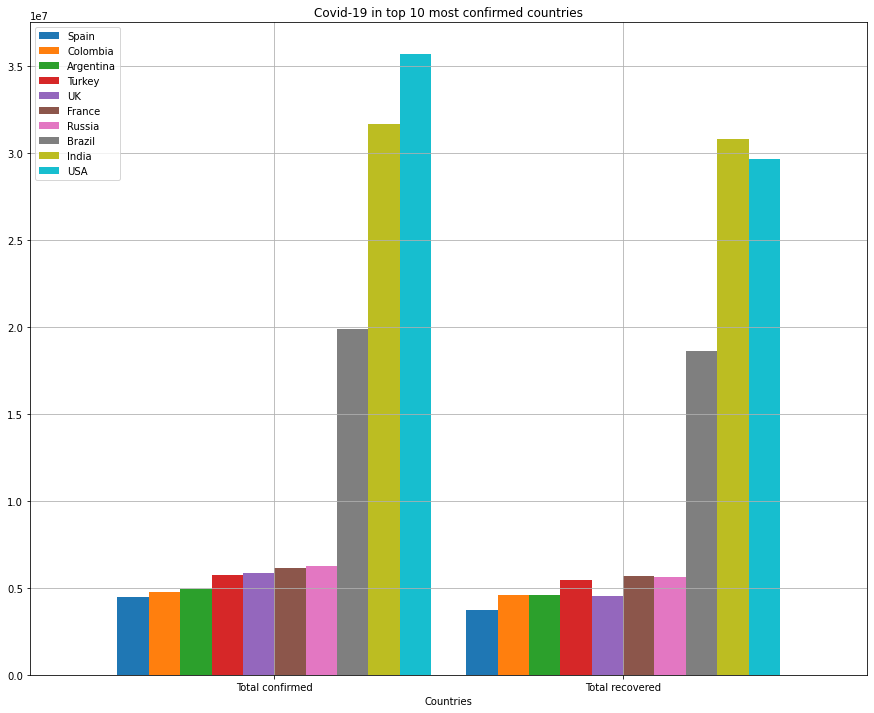

In [28]:
F1()

The chart below shows the cumulative number of confirmed cases per million population in the United States, The United Kingdom, France, Canada, Germany and China between 2020 and 2021。The outbreak began in March 2020. The epidemic did not fully spread to the UK until around July 2020. The cumulative number of cases per million population in the UK has been about the same as in France, but it surpassed France after August 2021, when it was close to 150000.

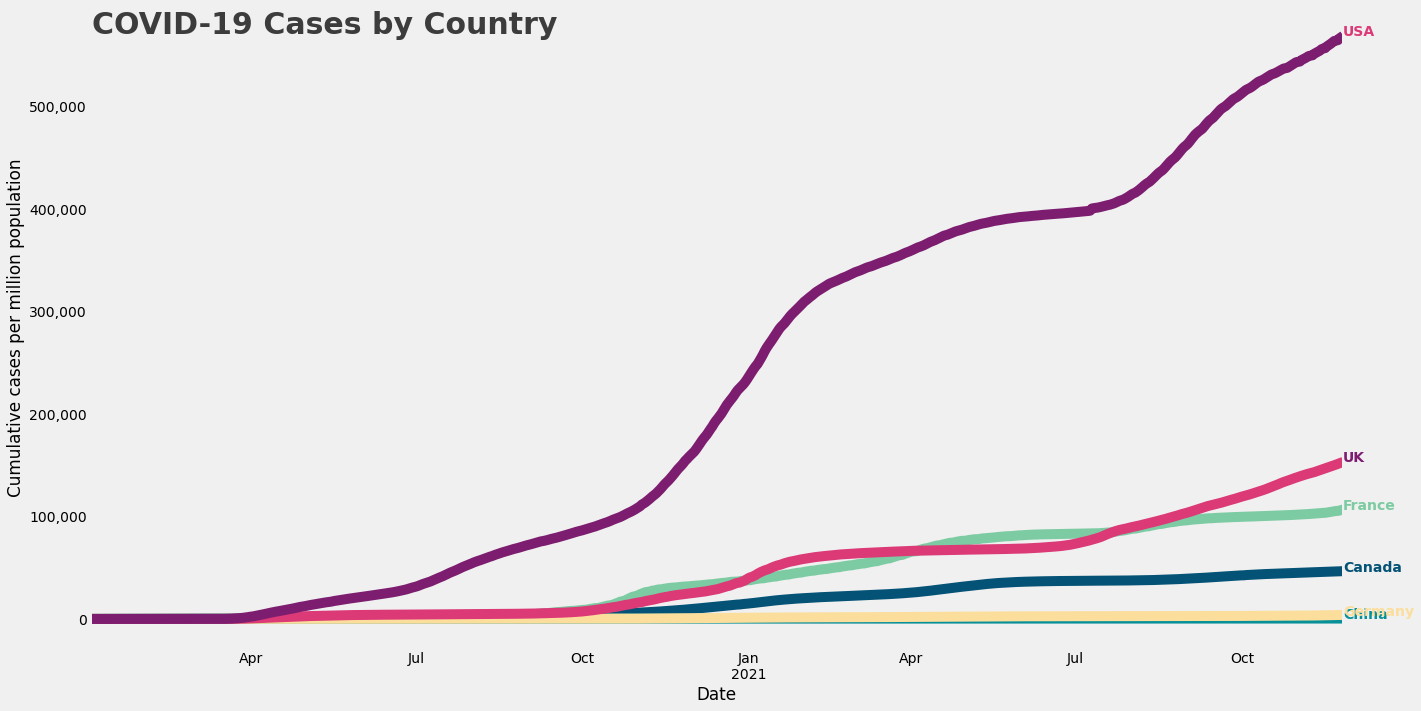

In [29]:
F2()

The chart below shows the daily increase in hot maps for the UK, Spain, Italy, Germany and France, with lighter colors representing more increases. As can be seen from the chart, The number of new cases in the UK increased significantly to over 40,000 in January 2021 and From July to November 2021, significantly higher than in other European countries. Most European countries have fewer than 30,000 new cases a day.

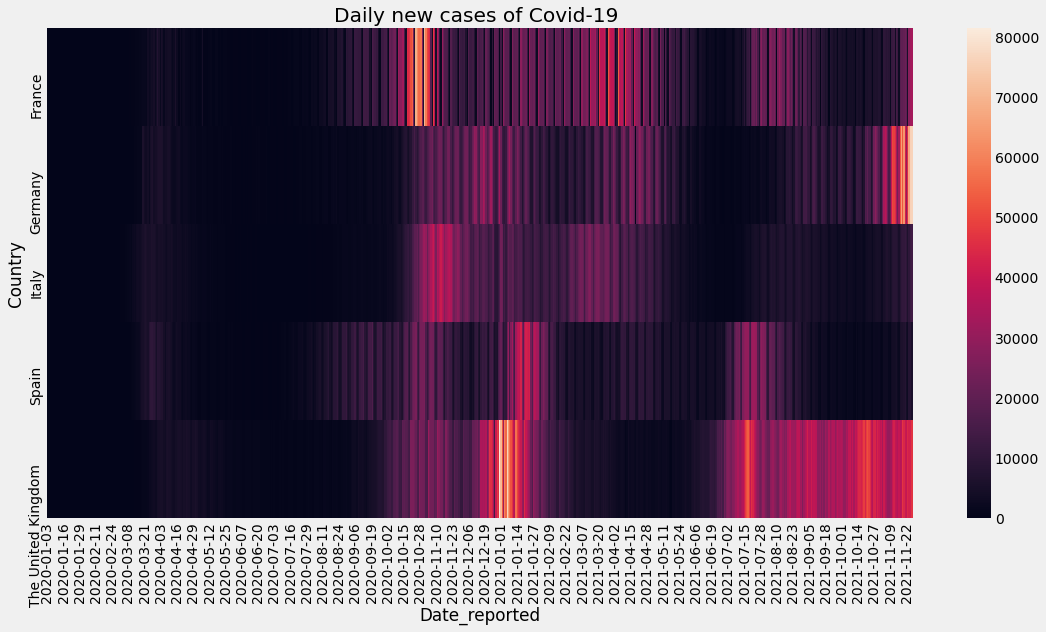

In [30]:
F3()

The area chart below shows vaccination coverage in Canada, China, France, Germany, the United Kingdom and the United States. The more vaccinations, the bigger the area. As can be seen from the graph, all countries are smaller than the UK except the US, which has a larger total number of vaccinations and a larger number of people who have received at least one dose of vaccine.

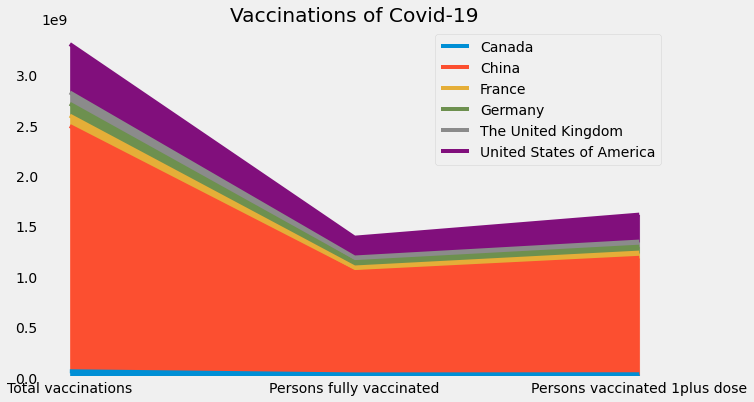

In [31]:
F4()

The figure below shows Pearson's coefficient for cumulative deaths and cumulative cases by country. The correlation coefficients for all countries are very high, suggesting that all countries have indeed suffered a high death toll from the pandemic. The correlation coefficient in the UK is lower than in other countries, suggesting that deaths in the UK are less affected by the cumulative number of cases than in other countries. It is important to note that China's cumulative deaths and cumulative confirmed cases are not a straight line. This may be due to the fact that the epidemic in China is not serious enough to provide sufficient data.

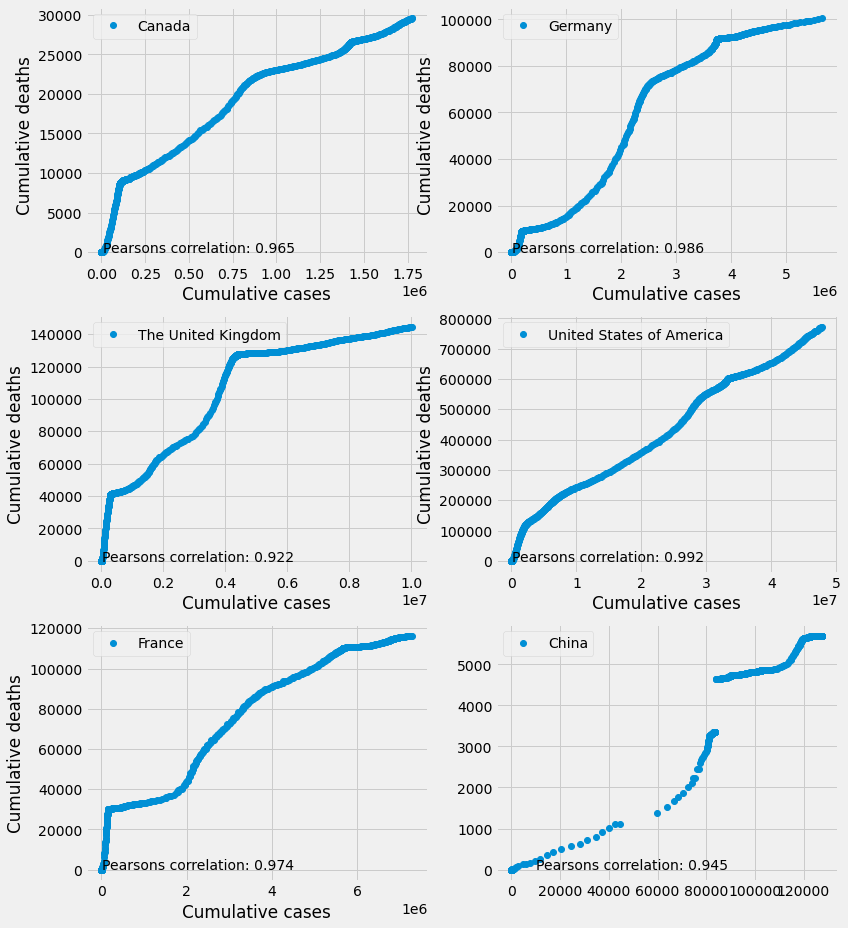

In [32]:
F5()

## Objective 2

### Explanation of Results

The data was analysed and processed to produce a total of six charts on the UK epidemic data from different perspectives, such as an epidemic map, a line graph of case growth and so on. 

In general, the epidemic situation in the UK is still relatively serious. The spread of vaccines has only reduced the number of deaths and has had a small impact on the increase in infections. At the national level, Northern Ireland has the most severe outbreak, with the highest overall infection and addition rates. In contrast, Scotland has done the best job of preventing the epidemic in the early stages, but there is a serious trend of infection at this stage. The epidemiological situation in England and Wales is average. At the regional level, the South East did the worst job of preventing infection, the North East did the best, while London and the rest of England had a moderate level of infection.

As each chart is analysed by a different object, the detailed explanation of each result is written above the individual icons to make it more intuitive and easier to understand, as shown below.

### Visualisation

* __Friendly Note:__ 
* __Due to the fact that the "Pycharts" module used for the visualisation is based on JavaScript rendering, this may lead to problems with charts not being displayed when the code is not running.__
* __As the submission does not require the datasets to be submitted, so if it is required to verify that the result images in the PDF are generated by our code, please contact any member of our group by email (email address is at the top of the notebook) to provide the data sources and run the code to verify.__
* __We are very sorry for any inconvenience caused to your work__

The epidemic map below visualises the number of new cases per 100,000 people in each UK nation in the last seven days.<br> 
a. It can be seen that Northern Ireland has had the worst case rate of the epidemic in the past week, while Scotland has done the best job of preventing it.

In [33]:
objective_2_map()

The line graph below shows the accumulated infections per 100,000 people by nation of the UK since March 2020.<br> 
a. It can be seen that at the beginning of the epidemic, from March to October 2020, the increase in case rates was close across nations. Over the next ten months, Scotland has significantly fewer case rate than the other three nations. However, after August 2021, the increase in Scotland also rises significantly. As of the time of data collection, Scotland and England had similar infection rates, with Northern Ireland having the highest rates.

In [34]:
objective_2_line()

The following nested pie charts show the total number of cases and their proportion by nation in the UK and by region in England.<br>
a. The graph shows that the number of infections in England is close to 85% of the entire UK, this is due to the fact that England has a much higher population than the other three countries, as we know from the previous graph that England does not have the highest infection rate.<br>
b. Among the regions in England, NorthWest, London and South East have the highest number of infections, while North East has the lowest number of infections and the other regions have similar numbers.

In [35]:
objective_2_pie()

The box plot below shows the daily case distribution by region in England.<br>
a. The South East region is the most affected, with a daily increase of between 6,000 and 7,500 cases, while the North East region is the best prepared for the epidemic, keeping it under 2,000. The rest of the region is in a similar position, with Yorkshire having a slightly better situation.

In [36]:
objective_2_box()

The chart below shows the vaccination situation in the UK.<br>
a. It can be seen visually that the vaccination rate for both the first and second doses is over 80%, however, the progress of the booster vaccination is quite slow, with less than 30% of the vaccination rate.

In [37]:
objective_2_pictorialBar()

The composite graph below shows the relationship between vaccination rates and daily cases, daily deaths over time, since vaccination began.<br>
a. The daily number of new cases and deaths declined rapidly after the start of vaccination, reaching their lowest point in April and May.<br>
b. From June onwards, there was a significant pick-up in the number of additional daily cases and it has remained at a relatively high value since then, close to that of the non-vaccinated period.<br>
c. Compared to the daily increase in cases, the daily death rate has rebounded less and stabilized at around 150.<br>
d. The impact of booster shots on new cases and deaths is not yet visible due to the short duration of the vaccination and the low vaccination rate.

In [38]:
objective_2_bar_line_multiple()

## Objective 3

### Explanation of Results

We can see a rise in the number of confirmed cases in April 2020, followed by a fallback, probably due to the closure policy at the beginning of the epidemic. The number of infections bounces back quickly in October 2020 after a period of low levels. The number of infections rises to a new peak of 80,000 infections per day in January 2021 after a round of intensified blockade policies. The number of infections declines rapidly after this, probably due to the development of a vaccine and the start of vaccination. However, the number of infections spiked again after July 2021 to 60,000 per day and then fluctuated at 40,000 per day.

The unemployment rate in the UK rose from below 4 in January 2020 to above 5 between September and February 2021 as the epidemic progressed, before dropping to just above 4 in August as the epidemic situation improved, but not fully returning to pre-epidemic levels.

In terms of the impact of gender on unemployment rates, men appear to be more likely to lose their jobs than women. Women account for only 47.6% of the unemployed on average, compared to 52.4% of men.

In terms of the relationship between unemployment and occupation, of all the occupations, the most likely to be unemployed are professional occupations and the least likely to be unemployed are operatives.

### Visualisation

* __Friendly Note:__ 
* __Due to the fact that the "Pycharts" module used for the visualisation is based on JavaScript rendering, this may lead to problems with charts not being displayed when the code is not running.__
* __As the submission does not require the datasets to be submitted, so if it is required to verify that the result images in the PDF are generated by our code, please contact any member of our group by email (email address is at the top of the notebook) to provide the data sources and run the code to verify.__
* __We are very sorry for any inconvenience caused to your work.__

The following line chart shows the daily number of new cases in UK for comparison with the unemployment rate graph.

In [39]:
caseLine=case_line()
caseLine.render_notebook() #Draw the figure

The chart below shows a line chart of the overall unemployment rate in the UK over time.

In [40]:
totalUnemploymenRateLine=total_unemployment_rate_line()
totalUnemploymenRateLine.render_notebook() #Draw the figure

The chart below shows the trend in unemployment rates over time for different genders.

In [41]:
genderLine=gender_line()
genderLine.render_notebook()

The chart below shows the proportions of the unemployed by gender.

In [42]:
gender_pie=gender_Pie()
gender_pie.render_notebook() #Draw the pie chart

The chart below shows the proportions of the unemployed by occupations.

In [43]:
occupations_pie=occupations_Pie()
occupations_pie.render_notebook() # Draw the pie chart

# Conclusion

### Achievements

Overall, the situation in the UK remains serious. Globally, the UK has the sixth highest cumulative number of confirmed cases. By the end of November 2021, the UK was still adding more than 40,000 cases a day, a figure significantly higher than any other European country. The UK's total number of vaccinations is higher than in most other countries, a fact that may have helped to contain the outbreak, making deaths and cumulative cases less relevant in the UK than in other countries.<br>

In the UK, vaccinating people has only reduced the number of deaths and had a small impact on the increase in infections. At the national level, Northern Ireland is the most affected, with the highest overall rates of infection and participation. In contrast, Scotland is best at prevention in the early stages, when there is a serious trend towards infection. The epidemiological situation in England and Wales is moderate. At a regional level, the southeast was worst at preventing infection and the North-East best, while London and the rest of England had moderate levels of infection.<br>

The pandemic has created employment problems for the British people. Due to the epidemic, the unemployment rate increased a lot. With the improvement of the epidemic, the unemployment rate showed a downward trend, but it did not recover to the pre-epidemic level. Among all unemployed people, the proportion of unemployed men was higher than that of women. Of all occupations, professionals were more likely to be unemployed, and operatives were the least likely to be unemployed. 

### Limitations

The project is constrained by data collection. The epidemic also generates data on many dimensions, including countries' epidemic policies, population movements and medical pressures, which can help to analyze the severity of the epidemic more accurately. However, these data are difficult to collect and transform into standard data conforming to the specification.
 
### Future Work

In the future, if we can collect data from more dimensions, we can make a better judgment on the severity of the epidemic in a certain period or a certain region, and even predict the information related to the epidemic, to provide more suggestions for combating the epidemic. 